#Time 3#
##Integrantes:##
###Fábio Cardoso, Felipe Barbosa, Rogério Fernandes e John Wesley###

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest



##Baixando a base de dados:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/devjaynemorais/modelos_descritivos_curso/main/Aula%2005/dados/credit_card.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


##Vusualizando os dados:

In [ ]:
df.shape

(8950, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

##Limpeza dos dados:

In [ ]:
df['CREDIT_LIMIT'].describe()


count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [ ]:
df['CREDIT_LIMIT'].isnull().value_counts()

False    8949
True        1
Name: CREDIT_LIMIT, dtype: int64

In [ ]:
df.loc[df['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [ ]:
#Substituindo o valor NaN pela mediana
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)
df['CREDIT_LIMIT'][5203]

3000.0

In [ ]:
df.loc[df['MINIMUM_PAYMENTS'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# Dropar os registros NaN
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8637 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8637 non-null   object 
 1   BALANCE                           8637 non-null   float64
 2   BALANCE_FREQUENCY                 8637 non-null   float64
 3   PURCHASES                         8637 non-null   float64
 4   ONEOFF_PURCHASES                  8637 non-null   float64
 5   INSTALLMENTS_PURCHASES            8637 non-null   float64
 6   CASH_ADVANCE                      8637 non-null   float64
 7   PURCHASES_FREQUENCY               8637 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8637 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8637 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8637 non-null   float64
 11  CASH_ADVANCE_TRX                  8637 non-null   int64  
 12  PURCHA

In [ ]:
df['CUST_ID'].duplicated().unique()

array([False])

In [ ]:
df2 = df.drop(labels = 'CUST_ID', axis = 1)
df2.head(1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.0,0.166667,0.0,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12


In [ ]:
df2.shape

(8637, 17)

##Padronizar os dados##

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
escala = StandardScaler()
df2_esc = escala.fit_transform(df2)

##DBSCAN e Isolation Forest com PCA##

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
df2_pca = pca.fit_transform(df2_esc)
df2_pca

array([[-1.69630271, -1.12218035],
       [-1.21486287,  2.43612573],
       [ 0.93620277, -0.38530821],
       ...,
       [-0.93064991, -1.84163524],
       [-2.35651615, -0.71893474],
       [-0.59738132, -0.44642845]])

In [ ]:
df2_pca.shape

(8637, 2)

##Escolha do valor do EPS##

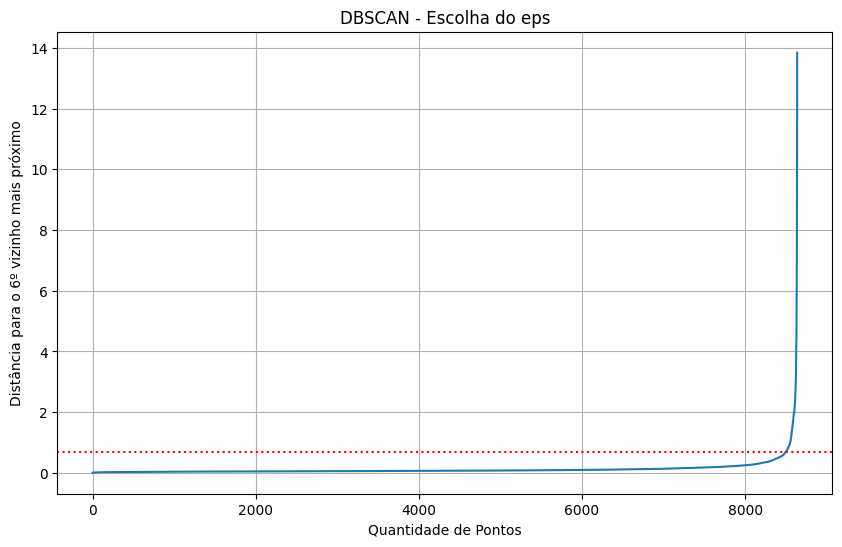

In [ ]:
# Calculate the distances to the min_samples nearest neighbors for each point
from sklearn.neighbors import NearestNeighbors
dbscan = DBSCAN(eps=None, min_samples=6)  # Fixa o min_sample

neigh = NearestNeighbors(n_neighbors=dbscan.min_samples)
neigh.fit(df2_pca)
distances, _ = neigh.kneighbors()

# Sort the distances and plot the Knee Method curve
sorted_distances = sorted(distances[:, -1])
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_distances) + 1), sorted_distances)
plt.xlabel('Quantidade de Pontos')
plt.ylabel(f'Distância para o {dbscan.min_samples}º vizinho mais próximo')
plt.title('DBSCAN - Escolha do eps')
plt.grid(True)
plt.axhline(y=0.68, c='red', linestyle=':')
plt.show()

##Visualizar os dados do DBSCAN e do Isolation Forest##

<Axes: title={'center': 'Isolation'}>

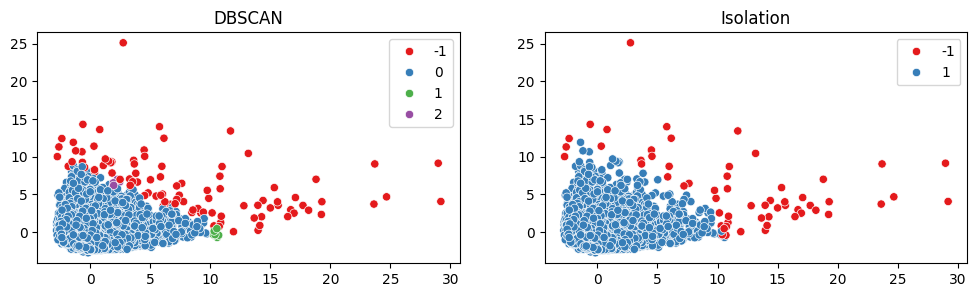

In [ ]:
# Criar o modelo Isolation Forest
# Treinar o modelo
iso_forest = IsolationForest(contamination=0.0068)  # Ajuste a porcentagem de contaminação conforme necessário
dbscan = DBSCAN(eps=0.68, min_samples=6)

dbscan_labels =  dbscan.fit_predict(df2_pca)
isolation_labels = iso_forest.fit_predict(df2_pca)

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(12, 3))

axes[0].set_title('DBSCAN')
axes[1].set_title('Isolation')

sns.scatterplot(x=df2_pca[:, 0], y=df2_pca[:, 1], hue=dbscan_labels, ax=axes[0], palette='Set1')
sns.scatterplot(x=df2_pca[:, 0], y=df2_pca[:, 1], hue=isolation_labels, ax=axes[1], palette='Set1')

In [ ]:
classificacao = dbscan.labels_
np.unique(classificacao, return_counts=True)

(array([-1,  0,  1,  2]), array([  95, 8530,    7,    5]))

In [ ]:
classificacao.shape

(8637,)

##Incluir o agrupamento no Dataset##

In [ ]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento['Grupo'].value_counts()

 0    8530
-1      95
 1       7
 2       5
Name: Grupo, dtype: int64

In [ ]:
df2['Grupo'] = agrupamento

In [ ]:
df2.shape

(8637, 18)

##Grupo 1 do agrupamento do DBSCAN##

In [ ]:
df_grupo1 = df2.loc[df2['Grupo'] == 1]
df_grupo1.head(7)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Grupo
522,986.149218,0.454545,0.00,0.00,0.00,2955.030338,0.000000,0.000000,0.000000,0.166667,6,0,3000.0,832.894753,706.541302,0.000000,12,1.0
1320,910.682404,1.000000,0.00,0.00,0.00,1435.307385,0.000000,0.000000,0.000000,0.166667,4,0,1500.0,1687.978206,288.284812,0.083333,12,1.0
1488,937.434519,1.000000,1124.88,1085.63,39.25,0.000000,0.416667,0.333333,0.083333,0.000000,0,9,2500.0,993.196174,252.572491,0.000000,12,1.0
2153,5067.576984,1.000000,714.68,402.68,312.00,726.955255,1.000000,0.083333,1.000000,0.083333,2,14,5000.0,1649.118645,2967.748073,0.000000,12,1.0
4885,38.013028,1.000000,469.62,0.00,469.62,0.000000,0.833333,0.000000,0.833333,0.000000,0,12,4000.0,744.854844,68.986720,0.400000,12,1.0
5317,467.345479,1.000000,46.74,0.00,46.74,0.000000,0.166667,0.000000,0.166667,0.000000,0,2,2500.0,122.054178,206.106505,0.000000,12,1.0
5395,3182.968599,1.000000,2502.46,2455.79,46.67,1837.023964,0.833333,0.833333,0.166667,0.500000,22,53,5500.0,2170.561697,1731.420819,0.000000,12,1.0


##Grupo 2 do agrupamento do DBSCAN##

In [ ]:
df_grupo1 = df2.loc[df2['Grupo'] == 2]
df_grupo1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Grupo
247,6.390383,1.000000,79.66,0.00,79.66,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1500.0,75.896288,75.967742,0.000000,12,2.0
310,53.208422,1.000000,498.17,459.02,39.15,0.000000,0.916667,0.916667,0.083333,0.000000,0,14,15000.0,611.606459,162.943080,0.909091,12,2.0
2480,166.258538,0.909091,1377.31,827.35,549.96,133.878836,1.000000,0.083333,1.000000,0.083333,1,14,16000.0,1770.052426,190.754221,0.090909,12,2.0
3763,92.279773,1.000000,842.51,842.51,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,12,9500.0,655.378633,151.346633,1.000000,12,2.0
5108,581.248560,0.909091,556.83,484.88,71.95,0.000000,0.727273,0.636364,0.090909,0.000000,0,32,1500.0,328.462817,345.557752,0.000000,11,2.0
